In [1]:
import libs as lb
import pickle as pk
import pandas as pd
import numpy as np
from numpy import *
import time
import matplotlib.pyplot as plt
from tqdm import *
from pylab import *
from multiprocessing import Pool
import pickle
import os
import torch
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Data Analysis

### 1. Gulf Stream Region

#### Spatial Data Distribution

In [2]:
# Load the data
load = True
if load:    
    region = pd.read_pickle('GulfStream_v2.pkl')
else:
    region = lb.region_ex('GulfStream')

In [3]:
region

{'pres': array([   4.6,    9.8,   19.4, ..., 1913. , 1938. , 1961. ], dtype=float32),
 'temp': array([27.077, 27.076, 27.01 , ...,  3.106,  3.072,  3.047], dtype=float32),
 'psal': array([36.351, 36.352, 36.355, ..., 34.919, 34.919, 34.919], dtype=float32),
 'lon': array([-64.235, -64.235, -64.235, ..., -47.477, -47.477, -47.477],
       dtype=float32),
 'lat': array([32.565, 32.565, 32.565, ..., 48.582, 48.582, 48.582], dtype=float32),
 'juld': array([18513.775, 18513.775, 18513.775, ..., 24140.83 , 24140.83 ,
        24140.83 ], dtype=float32),
 'sla': array([-0.03939203, -0.03939203, -0.03939203, ...,  0.01588686,
         0.01588686,  0.01588686], dtype=float32),
 'profile_ids': array([   64,    64,    64, ..., 10919, 10919, 10919], dtype=int64),
 'norm_diy': array([0.56712329, 0.56712329, 0.56712329, ..., 0.96438356, 0.96438356,
        0.96438356]),
 'norm_y': array([0.11764706, 0.11764706, 0.11764706, ..., 1.        , 1.        ,
        1.        ]),
 'lat_sin': array([0.538256

In [99]:
g_lon = np.unique(np.round((region['lon']),decimals=1))
g_lat = np.unique(np.round((region['lat']),decimals=1))
lons, lats = np.meshgrid(g_lon, g_lat)
lons = lons.reshape(1,lons.shape[0]*lons.shape[1])[0]
lats = lats.reshape(1,lats.shape[0]*lats.shape[1])[0]
lon_list = np.round(g_lon.tolist(), decimals = 1)
lats_list = np.round(g_lat.tolist(), decimals = 1)
nb_profiles = np.zeros(lons.shape[0])

In [100]:
coord_pairs = {( np.round(lon, decimals = 1), np.round(lat, decimals = 1)): 0 for lat in lats_list for lon in lon_list}

In [101]:
o_lon = np.round((region['lon']),decimals=1)
o_lat = np.round((region['lat']),decimals=1)

In [102]:
i = 0
for coord in coord_pairs.keys():   
    lon_i = coord[0]
    lat_i = coord[1]
    nb = size(np.where((o_lon == lon_i)*(o_lat == lat_i)))
    nb_profiles[i] = nb
    i = i +1
    if i % 10000 == 0:
        print('Completing: ', i)
nb_profiles = np.int_(nb_profiles)

Completing:  10000
Completing:  20000
Completing:  30000
Completing:  40000
Completing:  50000
Completing:  60000
Completing:  70000
Completing:  80000


In [106]:
mask = np.where(nb_profiles != 0)
lon_plot = lons[mask]
lat_plot = lats[mask]
nb_plot = nb_profiles[mask]

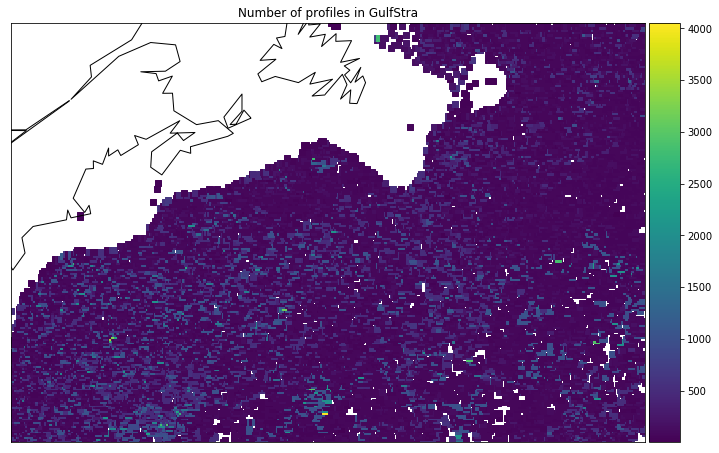

In [138]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.title("Number of profiles in GulfStra")
map = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=50,llcrnrlon=-75,urcrnrlon=-35,resolution='c')
map.drawcoastlines()
x, y = map(lon_plot, lat_plot)
map.scatter(x, y, c = nb_plot, marker = 's')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax)
plt.show()

#### Monthly Data Distribution

In [3]:
encoded_juld = [julian.from_jd(round(x), fmt='mjd') for x in region['juld']]

In [4]:
months = np.asarray([x.month for x in encoded_juld])
years = np.asarray([x.year for x in encoded_juld])

In [6]:
months_ = np.linspace(1,12,12, dtype = int)
count_months = np.zeros(months_.shape[0], dtype = int)
years_ = np.linspace(min(years),max(years),max(years) - min(years) + 1, dtype = int)
count_years = np.zeros(years_.shape[0]*months_.shape[0], dtype = int)

In [7]:
for m in list(months_):
    count = size(np.where(months == m))
    count_months[m-1] = count

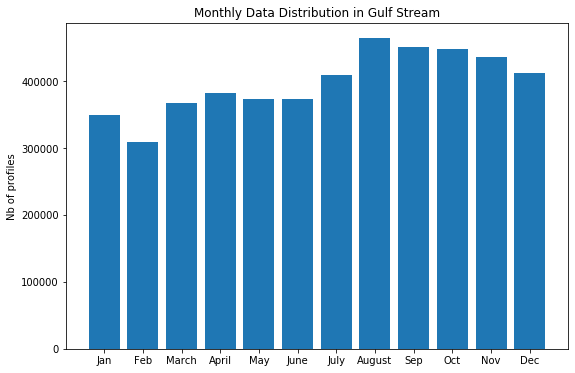

In [80]:
x_labels = ['Jan','Feb','March','April','May', 'June', 'July', 'August', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(9, 6))
plt.bar(x_labels,count_months);
plt.title("Monthly Data Distribution in Gulf Stream");
plt.ylabel("Nb of profiles");

In [23]:
i = 0
for y in list(years_):
    for m in list(months_):
        count = size(np.where((years == y)*(months == m)))
        count_years[i] = count
        i = i + 1

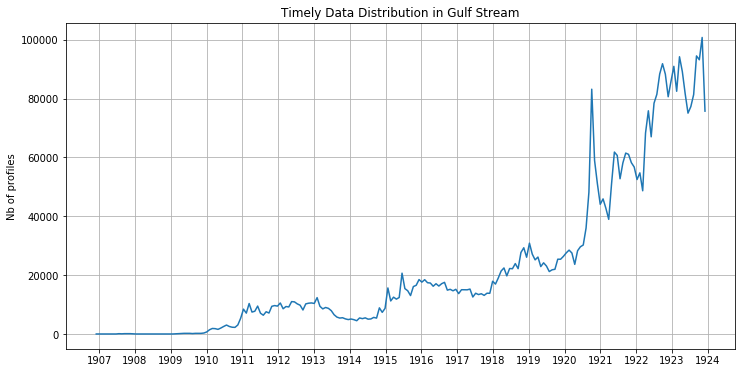

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(count_years);
plt.grid()
plt.xticks(spots,years_);
plt.title('Timely Data Distribution in Gulf Stream');
plt.ylabel('Nb of profiles');

https://rabernat.github.io/research_computing/intro-to-basemap.html